# Fake Review Detection

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/akshat-11004/WOC-25/main/fakeReviewData.csv')

In [3]:
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [4]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [5]:
df.duplicated().sum()

np.int64(12)

In [6]:
df = df.drop_duplicates()

In [7]:
df = df.rename(columns={'text_': 'reviews'})
df

,category,rating,label,reviews
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [8]:
df['rating'].value_counts()

,count
rating,
5.0,24547
4.0,7965
3.0,3786
1.0,2155
2.0,1967


In [9]:
pip install wordcloud matplotlib pandas

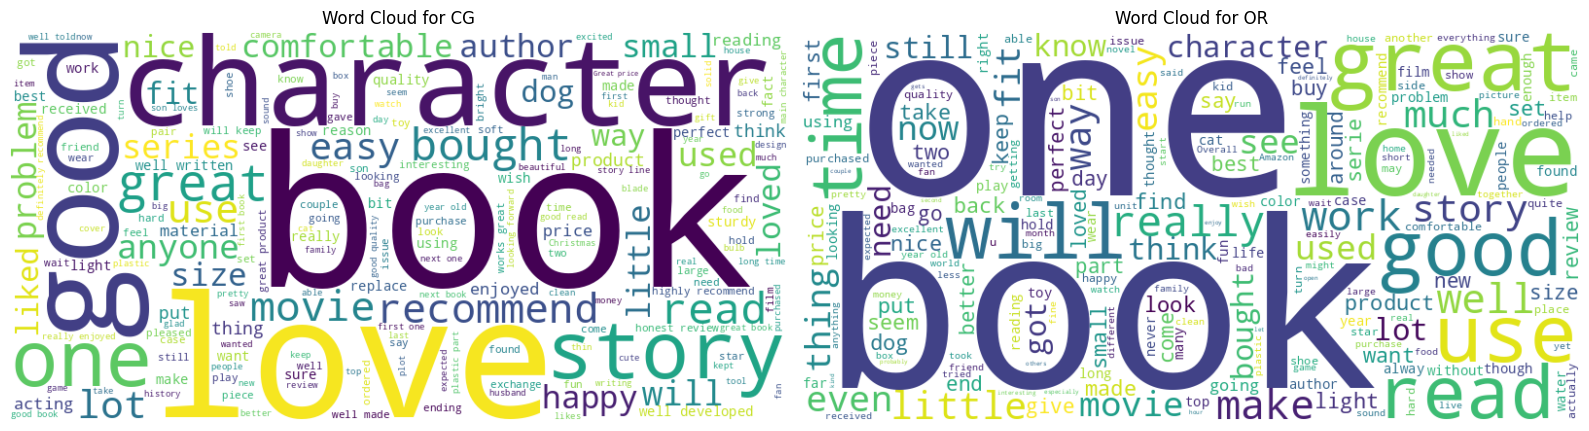

In [12]:
cg_reviews = df[df['label'] == 'CG']['reviews'].dropna().str.cat(sep=' ')
or_reviews = df[df['label'] == 'OR']['reviews'].dropna().str.cat(sep=' ')

# Generate word clouds
wordcloud_cg = WordCloud(width=800, height=400, background_color='white').generate(cg_reviews)
wordcloud_or = WordCloud(width=800, height=400, background_color='white').generate(or_reviews)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_cg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for CG')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_or, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for OR')

plt.tight_layout()
plt.show()

In [9]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [10]:
df['reviews'][0], clean_text(df['reviews'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [11]:
df['reviews'].head().apply(clean_text)

,reviews
0,Love Well made sturdy comfortable love itVery ...
1,love great upgrade original Ive mine couple years
2,pillow saved back love look feel pillow
3,Missing information use great product price
4,nice set Good quality set two months


In [12]:
df.shape

(40420, 4)

In [13]:
df['reviews'] = df['reviews'].astype(str)

In [14]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [15]:
preprocess(df['reviews'][4])

'Very nice set Good quality We set two months'

In [16]:
df['reviews'] = df['reviews'].apply(preprocess)

KeyboardInterrupt: 

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['reviews'] = df['reviews'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["reviews"] = df["reviews"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['reviews'].head()

,reviews
0,love well made sturdi comfort i love veri pretti
1,love great upgrad origin i 've mine coupl year
2,thi pillow save back i love look feel pillow
3,miss inform use great product price i
4,veri nice set good qualiti we set two month


In [ ]:
df['length'] = df['reviews'].apply(len)

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20205.0  4.259490  1.141245  1.0  4.0  5.0  5.0  5.0  20205.0   
OR     20215.0  4.253228  1.147668  1.0  4.0  5.0  5.0  5.0  20215.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     173.689136  174.008619  0.0  57.0   99.0  217.0  1300.0  
OR     237.973040  253.034431  8.0  74.0  134.0  296.0  2232.0

In [ ]:
df[df['label']=='OR'][['reviews','length']].sort_values(by='length',ascending=False).head().iloc[0].reviews

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [ ]:
def reviewsprocess(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow_transformer = CountVectorizer(analyzer=reviewsprocess)
bow_transformer

CountVectorizer(analyzer=<function reviewsprocess at 0x7b2ea1d74e00>)

In [ ]:
bow_transformer.fit(df['reviews'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34454


In [ ]:
review4 = df['reviews'][3]
review4

'miss inform use great product price i'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34454)>
  Coords	Values
  (0, 13599)	1
  (0, 15840)	1
  (0, 19850)	1
  (0, 23849)	1
  (0, 23979)	1
  (0, 32183)	1
(1, 34454)


In [ ]:
bow_reviews = bow_transformer.transform(df['reviews'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40420, 34454)
Amount of non zero values in the bag of words model: 1013723


In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34454)>
  Coords	Values
  (0, 13599)	1
  (0, 15840)	1
  (0, 19850)	1
  (0, 23849)	1
  (0, 23979)	1
  (0, 32183)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.913957550319243
2.821871107266458


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40420, 34454)
No. of Dimensions: 2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'],df['label'],test_size=0.35)

## Naive Bayes Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=reviewsprocess)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function reviewsprocess at 0x7b2ea1d74e00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(X_test)
predictions

array(['CG', 'OR', 'OR', ..., 'CG', 'CG', 'OR'], dtype='<U2')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report:',classification_report(y_test,predictions))
print('Confusion Matrix:',confusion_matrix(y_test,predictions))
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,predictions)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7011
          OR       0.88      0.81      0.84      7136

    accuracy                           0.85     14147
   macro avg       0.85      0.85      0.85     14147
weighted avg       0.85      0.85      0.85     14147

Confusion Matrix: [[6236  775]
 [1360 5776]]
Accuracy Score: 0.8490846115784265
Model Prediction Accuracy: 84.91%


## SVM

In [ ]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=reviewsprocess)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function reviewsprocess at 0x7b2ea1d74e00>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(X_test)
svc_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'CG', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(y_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(y_test,svc_pred))
print('Accuracy Score:',accuracy_score(y_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7011
          OR       0.87      0.90      0.88      7136

    accuracy                           0.88     14147
   macro avg       0.88      0.88      0.88     14147
weighted avg       0.88      0.88      0.88     14147

Confusion Matrix: [[6033  978]
 [ 702 6434]]
Accuracy Score: 0.8812469074715488
Model Prediction Accuracy: 88.12%


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=reviewsprocess)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function reviewsprocess at 0x7b2ea1d74e00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(X_test)
lr_pred

array(['OR', 'OR', 'OR', ..., 'CG', 'CG', 'OR'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(y_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      7011
          OR       0.86      0.88      0.87      7136

    accuracy                           0.87     14147
   macro avg       0.87      0.87      0.87     14147
weighted avg       0.87      0.87      0.87     14147

Confusion Matrix: [[5974 1037]
 [ 856 6280]]
Accuracy Score: 0.8661907118116915
Model Prediction Accuracy: 86.62%
